# Load Dataset

Dataset from:
https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction?resource=download

In [ ]:
# Attribute Information:
# Age: age of the patient [years]
# Sex: sex of the patient [M: Male, F: Female]
# ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY:
# Asymptomatic]
# RestingBP: resting blood pressure [mm Hg]
# Cholesterol: serum cholesterol [mm/dl]
# FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
# RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality
# (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
# MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
# ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
# Oldpeak: oldpeak = ST [Numeric value measured in depression]
# ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
# HeartDisease: output class [1: heart disease, 0: Normal]

In [ ]:
df = read.csv('heart.csv', header = TRUE)

In [ ]:
head(df)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
,<int>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<int>,<chr>,<dbl>,<chr>,<int>
1,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
2,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
3,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
4,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
5,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
6,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0


# Visualization Formatting

In [ ]:
# General plot parameters
par(
  cex.main = 1.2,
  font.main = 2,
  cex.lab = 1.0,
  font.lab = 1,
  cex.axis = 1.0,
  family = "sans"
)

In [ ]:
# Custom ggplot theme
baseR_theme = theme_minimal(base_family = "sans") +
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold", size = 16),
    axis.title.x = element_text(size = 12),
    axis.title.y = element_text(size = 12),
    axis.text = element_text(size = 10),
    panel.grid.major.x = element_blank(),  # Remove vertical gridlines
    panel.grid.minor = element_blank(),
    panel.grid.major.y = element_line(color = "gray80"),
    axis.ticks = element_line(color = "black")
  )

# Exploratory Data Analysis

## General Structure of Data Frame and Cleaning

In [ ]:
# Check data frame structure
str(df)

'data.frame':	918 obs. of  12 variables:
 $ Age           : int  40 49 37 48 54 39 45 54 37 48 ...
 $ Sex           : chr  "M" "F" "M" "F" ...
 $ ChestPainType : chr  "ATA" "NAP" "ATA" "ASY" ...
 $ RestingBP     : int  140 160 130 138 150 120 130 110 140 120 ...
 $ Cholesterol   : int  289 180 283 214 195 339 237 208 207 284 ...
 $ FastingBS     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ RestingECG    : chr  "Normal" "Normal" "ST" "Normal" ...
 $ MaxHR         : int  172 156 98 108 122 170 170 142 130 120 ...
 $ ExerciseAngina: chr  "N" "N" "N" "Y" ...
 $ Oldpeak       : num  0 1 0 1.5 0 0 0 0 1.5 0 ...
 $ ST_Slope      : chr  "Up" "Flat" "Up" "Flat" ...
 $ HeartDisease  : int  0 1 0 1 0 0 0 0 1 0 ...


In [ ]:
# Drop RestingECG, Oldpeak, and ST_Slope columns
df = df[, !(names(df) %in% c("RestingECG", "Oldpeak", "ST_Slope"))]

In [ ]:
# Check for missing values
missing_counts = colSums(is.na(df))

for (col in names(missing_counts)) {
  cat(col, ":", missing_counts[col], "\n")
}

Age : 0 
Sex : 0 
ChestPainType : 0 
RestingBP : 0 
Cholesterol : 0 
FastingBS : 0 
MaxHR : 0 
ExerciseAngina : 0 
HeartDisease : 0 


In [ ]:
# Check for 0s in each column
zero_counts = colSums(df == 0, na.rm = TRUE)

# Print results
for (col in names(zero_counts)) {
  cat(col, ":", zero_counts[col], "\n")
}

Age : 0 
Sex : 0 
ChestPainType : 0 
RestingBP : 1 
Cholesterol : 172 
FastingBS : 704 
MaxHR : 0 
ExerciseAngina : 0 
HeartDisease : 410 


In [ ]:
# Remove 0's in cells and replace with mean

# Identify numeric columns
numeric_cols = sapply(df, is.numeric)

# Exclude 'HeartDisease' and 'FastingBS' from numeric columns
numeric_cols["HeartDisease"] = FALSE
numeric_cols["FastingBS"] = FALSE

# Loop through numeric columns and replace 0s with the column mean
for (col_name in names(df)[numeric_cols]) {
  col_data = df[[col_name]]

  # Only replace if column has any 0s and mean is not 0
  if (any(col_data == 0, na.rm = TRUE)) {
    non_zero_mean = mean(col_data[col_data != 0], na.rm = TRUE)

    # Replace 0s with the non-zero mean
    df[[col_name]][col_data == 0] = non_zero_mean
  }
}

In [ ]:
# Double check 0s removed

# Check for 0s in each column
zero_counts = colSums(df == 0, na.rm = TRUE)

# Print results
for (col in names(zero_counts)) {
  cat(col, ":", zero_counts[col], "\n")
}

Age : 0 
Sex : 0 
ChestPainType : 0 
RestingBP : 0 
Cholesterol : 0 
FastingBS : 704 
MaxHR : 0 
ExerciseAngina : 0 
HeartDisease : 410 


In [ ]:
# Make a copy of the cleaned dataframe
df_cleaned = df

# Export to CSV
write.csv(df_cleaned, "df_cleaned.csv", row.names = FALSE)

In [ ]:
head(df_cleaned, 5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,HeartDisease
,<int>,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<chr>,<int>
1,40,M,ATA,140,289,0,172,N,0
2,49,F,NAP,160,180,0,156,N,1
3,37,M,ATA,130,283,0,98,N,0
4,48,F,ASY,138,214,0,108,Y,1
5,54,M,NAP,150,195,0,122,N,0


## Summary Statistic Visualizations

In [ ]:
# Visualize summary statistics for numeric variables

library(dplyr)
library(knitr)

# Select only numeric columns
numeric_df = df %>% select(where(is.numeric))

# Create a summary table
summary_table = data.frame(
  Variable = names(numeric_df),
  Min = sapply(numeric_df, min),
  Q1 = sapply(numeric_df, quantile, 0.25),
  Median = sapply(numeric_df, median),
  Mean = sapply(numeric_df, mean),
  Q3 = sapply(numeric_df, quantile, 0.75),
  Max = sapply(numeric_df, max)
)

# Table
kable(summary_table, digits = 2, caption = "Summary Statistics for Numeric Variables", row.names = FALSE)



Table: Summary Statistics for Numeric Variables

|Variable     | Min|  Q1| Median|   Mean|  Q3| Max|
|:------------|---:|---:|------:|------:|---:|---:|
|Age          |  28|  47|  54.00|  53.51|  60|  77|
|RestingBP    |  80| 120| 130.00| 132.54| 140| 200|
|Cholesterol  |  85| 214| 244.64| 244.64| 267| 603|
|FastingBS    |   0|   0|   0.00|   0.23|   0|   1|
|MaxHR        |  60| 120| 138.00| 136.81| 156| 202|
|HeartDisease |   0|   0|   1.00|   0.55|   1|   1|

In [ ]:
# Visualize summary statistics for numeric variables split by sex and disease status

library(dplyr)
library(knitr)

# Function to create summary table
create_summary = function(data) {
  numeric_df = data %>% select(where(is.numeric))

  data.frame(
    Variable = names(numeric_df),
    Min = sapply(numeric_df, min, na.rm = TRUE),
    Q1 = sapply(numeric_df, quantile, 0.25, na.rm = TRUE),
    Median = sapply(numeric_df, median, na.rm = TRUE),
    Mean = sapply(numeric_df, mean, na.rm = TRUE),
    Q3 = sapply(numeric_df, quantile, 0.75, na.rm = TRUE),
    Max = sapply(numeric_df, max, na.rm = TRUE)
  )
}

# Subsets
women_no_hd = df %>% filter(Sex == "F", HeartDisease == 0)
women_yes_hd = df %>% filter(Sex == "F", HeartDisease == 1)
men_no_hd = df %>% filter(Sex == "M", HeartDisease == 0)
men_yes_hd = df %>% filter(Sex == "M", HeartDisease == 1)

# Generate and display tables
kable(create_summary(women_no_hd), digits = 2, caption = "Women Without Heart Disease", row.names = FALSE)
kable(create_summary(women_yes_hd), digits = 2, caption = "Women With Heart Disease", row.names = FALSE)
kable(create_summary(men_no_hd), digits = 2, caption = "Men Without Heart Disease", row.names = FALSE)
kable(create_summary(men_yes_hd), digits = 2, caption = "Men With Heart Disease", row.names = FALSE)




Table: Women Without Heart Disease

|Variable     | Min|    Q1| Median|   Mean|    Q3| Max|
|:------------|---:|-----:|------:|------:|-----:|---:|
|Age          |  30|  44.0|     51|  51.20|  57.0|  76|
|RestingBP    |  94| 120.0|    130| 128.79| 139.0| 180|
|Cholesterol  | 141| 207.5|    239| 249.15| 277.5| 564|
|FastingBS    |   0|   0.0|      0|   0.07|   0.0|   1|
|MaxHR        |  90| 132.0|    152| 149.05| 164.5| 192|
|HeartDisease |   0|   0.0|      0|   0.00|   0.0|   0|



Table: Women With Heart Disease

|Variable     | Min|     Q1| Median|   Mean|     Q3| Max|
|:------------|---:|------:|------:|------:|------:|---:|
|Age          |  33|  51.00|   58.0|  56.18|  62.00|  73|
|RestingBP    |  95| 130.00|  139.0| 142.00| 157.25| 200|
|Cholesterol  | 164| 244.64|  253.5| 272.27| 304.50| 409|
|FastingBS    |   0|   0.00|    0.0|   0.32|   1.00|   1|
|MaxHR        |  90| 123.00|  142.5| 137.82| 154.00| 174|
|HeartDisease |   1|   1.00|    1.0|   1.00|   1.00|   1|



Table: Men Without Heart Disease

|Variable     | Min|    Q1| Median|   Mean|    Q3| Max|
|:------------|---:|-----:|------:|------:|-----:|---:|
|Age          |  28|  42.0|     51|  50.20|  57.0|  75|
|RestingBP    |  80| 120.0|    130| 130.93| 140.0| 190|
|Cholesterol  |  85| 204.0|    233| 233.65| 258.5| 458|
|FastingBS    |   0|   0.0|      0|   0.13|   0.0|   1|
|MaxHR        |  69| 134.5|    150| 147.67| 167.5| 202|
|HeartDisease |   0|   0.0|      0|   0.00|   0.0|   0|



Table: Men With Heart Disease

|Variable     | Min|  Q1| Median|   Mean|     Q3| Max|
|:------------|---:|---:|------:|------:|------:|---:|
|Age          |  31|  51|  57.00|  55.87|  62.00|  77|
|RestingBP    |  92| 120| 131.00| 133.62| 144.00| 200|
|Cholesterol  | 100| 223| 244.64| 246.61| 263.00| 603|
|FastingBS    |   0|   0|   0.00|   0.34|   1.00|   1|
|MaxHR        |  60| 112| 125.00| 126.55| 142.75| 195|
|HeartDisease |   1|   1|   1.00|   1.00|   1.00|   1|

## Boxplots of Variables

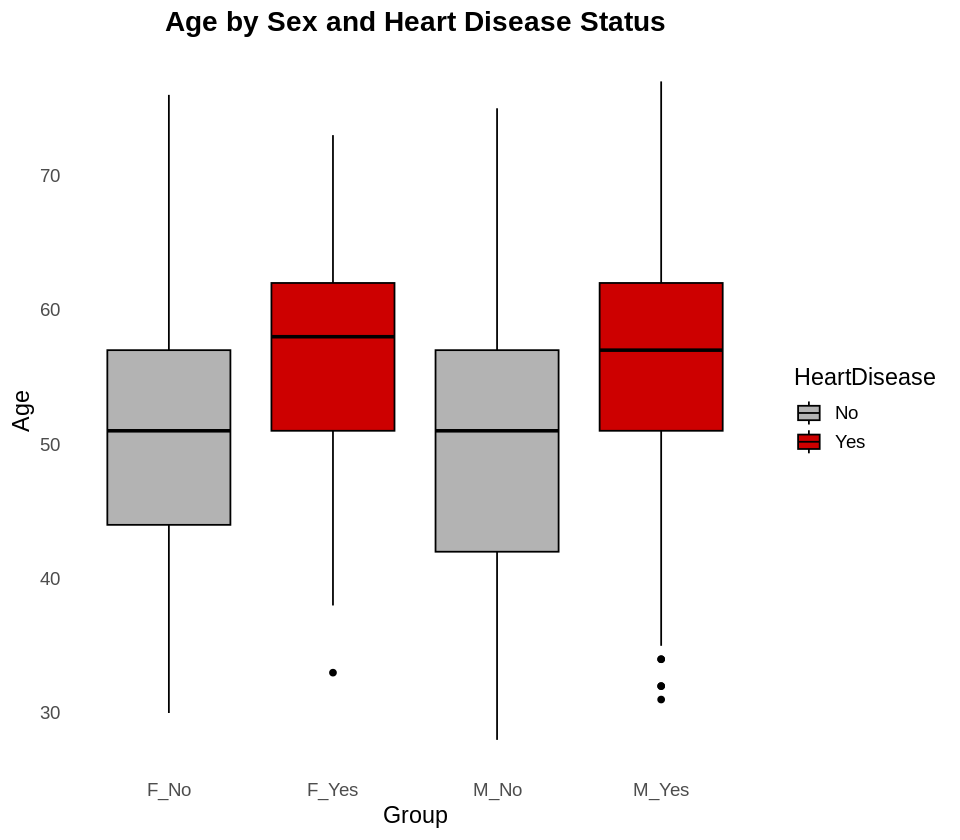

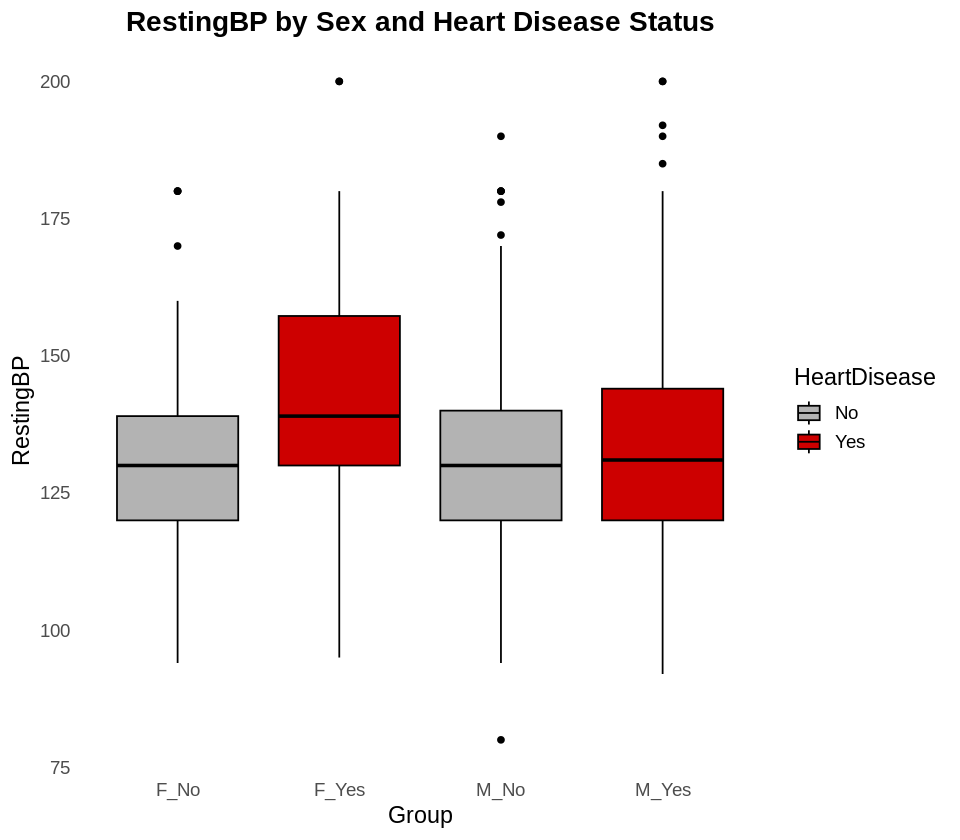

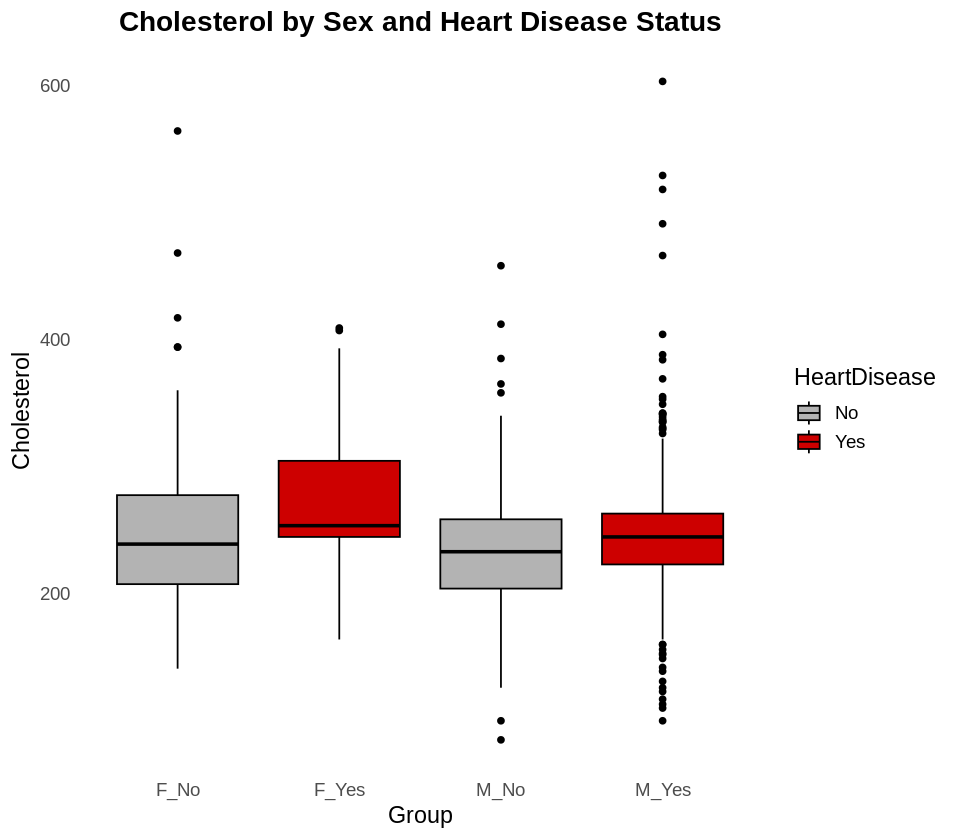

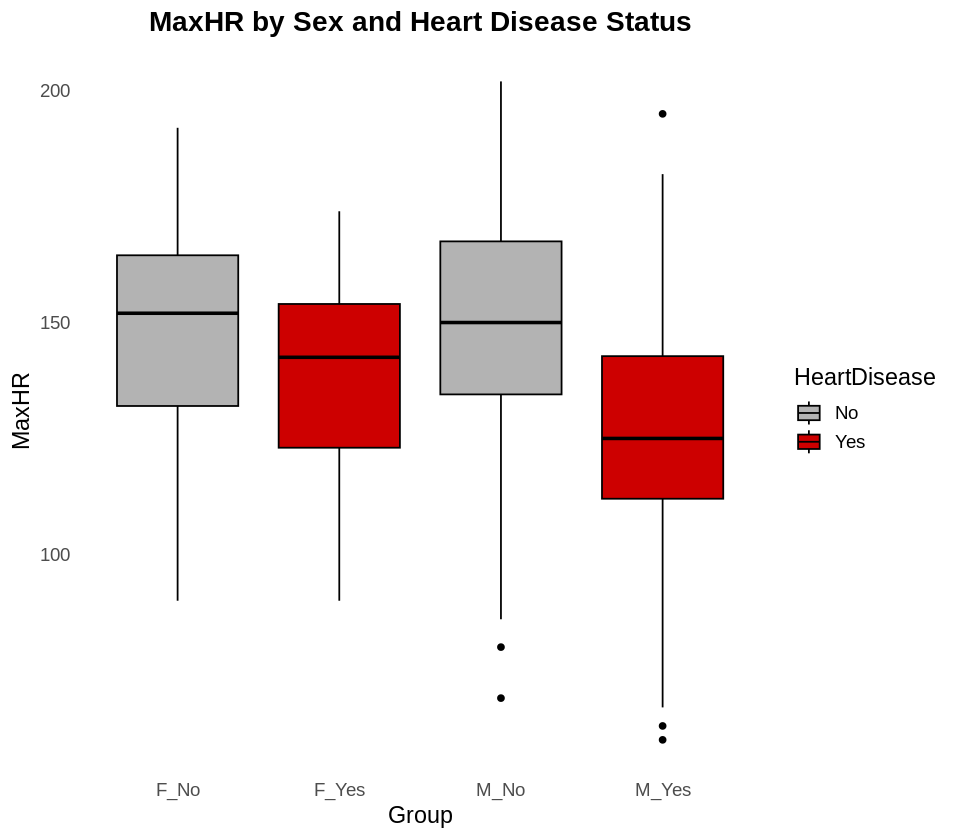

In [ ]:
# Load necessary libraries
library(ggplot2)
library(dplyr)

# Load dataset
df = read.csv("df_cleaned.csv")

# Convert variables to factors
df$HeartDisease = factor(df$HeartDisease, levels = c(0, 1), labels = c("No", "Yes"))

# Create new grouping variable and set desired order
df$Group = interaction(df$Sex, df$HeartDisease, sep = "_")
df$Group = factor(df$Group, levels = c("F_No", "F_Yes", "M_No", "M_Yes"))

# Age vs. Heart Disease
boxplot_age_heartdisease = ggplot(df, aes(x = Group, y = Age, fill = HeartDisease)) +
  geom_boxplot(color = "black") +
  scale_fill_manual(values = c("No" = "gray70", "Yes" = "red3")) +
  labs(
    title = "Age by Sex and Heart Disease Status",
    x = "Group",
    y = "Age"
  ) +
  theme_minimal(base_size = 14) +
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold"),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank()
  )

# RestingBP vs. Heart Disease
boxplot_restingBP_heartdisease = ggplot(df, aes(x = Group, y = RestingBP, fill = HeartDisease)) +
  geom_boxplot(color = "black") +
  scale_fill_manual(values = c("No" = "gray70", "Yes" = "red3")) +
  labs(
    title = "RestingBP by Sex and Heart Disease Status",
    x = "Group",
    y = "RestingBP"
  ) +
  theme_minimal(base_size = 14) +
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold"),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank()
  )

# Cholesterol vs. Heart Disease
boxplot_cholesterol_heartdisease = ggplot(df, aes(x = Group, y = Cholesterol, fill = HeartDisease)) +
  geom_boxplot(color = "black") +
  scale_fill_manual(values = c("No" = "gray70", "Yes" = "red3")) +
  labs(
    title = "Cholesterol by Sex and Heart Disease Status",
    x = "Group",
    y = "Cholesterol"
  ) +
  theme_minimal(base_size = 14) +
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold"),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank()
  )

# MaxHR vs. Heart Disease
boxplot_maxHR_heartdisease = ggplot(df, aes(x = Group, y = MaxHR, fill = HeartDisease)) +
  geom_boxplot(color = "black") +
  scale_fill_manual(values = c("No" = "gray70", "Yes" = "red3")) +
  labs(
    title = "MaxHR by Sex and Heart Disease Status",
    x = "Group",
    y = "MaxHR"
  ) +
  theme_minimal(base_size = 14) +
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold"),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank()
  )

options(repr.plot.width = 8)
print(boxplot_age_heartdisease)
print(boxplot_restingBP_heartdisease)
print(boxplot_cholesterol_heartdisease)
print(boxplot_maxHR_heartdisease)

# ggsave("boxplot_age_heartdisease.png", plot = boxplot_age_heartdisease, width = 8, height = 4, dpi = 300)
# ggsave("boxplot_restingBP_heartdisease.png", plot = boxplot_restingBP_heartdisease, width = 8, height = 4, dpi = 300)
# ggsave("boxplot_cholesterol_heartdisease.png", plot = boxplot_cholesterol_heartdisease, width = 8, height = 4, dpi = 300)
# ggsave("boxplot_maxHR_heartdisease2.png", plot = boxplot_maxHR_heartdisease, width = 8, height = 4, dpi = 300)

## Barplots of Variables

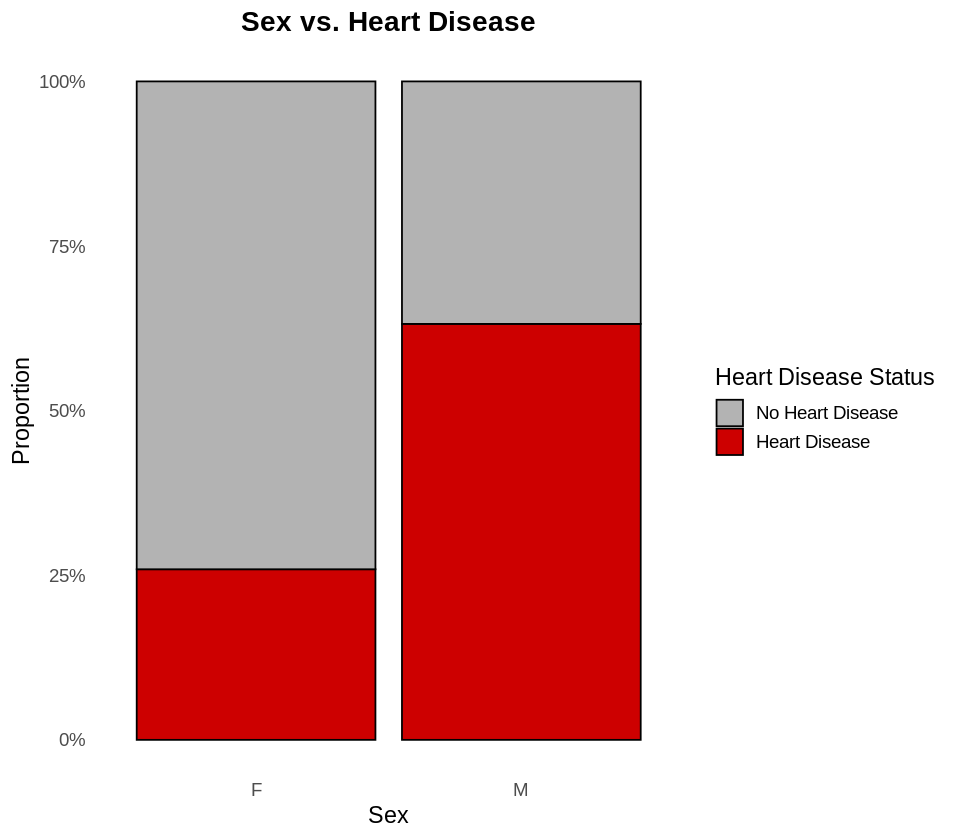

In [ ]:
# Load required libraries
library(ggplot2)
library(dplyr)

# Load dataset
df = read.csv("df_cleaned.csv")

# Recode variables
df$HeartDisease = factor(df$HeartDisease, levels = c("1", "0"))  # Heart Disease first for bottom stacking
df$Sex = factor(df$Sex, levels = c("F", "M"))

# Remove rows with missing values
df_clean = df %>% filter(!is.na(Sex), !is.na(HeartDisease))

# Create summarized and normalized proportion dataset
prop_data = df_clean %>%
  group_by(Sex, HeartDisease) %>%
  summarise(Count = n(), .groups = "drop") %>%
  group_by(Sex) %>%
  mutate(Proportion = Count / sum(Count))

# Bar plot of heart disease proportion by sex
ggplot(prop_data, aes(x = Sex, y = Proportion, fill = HeartDisease)) +
  geom_bar(stat = "identity", position = position_stack(reverse = TRUE), color = "black") +
  scale_fill_manual(
    values = c("1" = "red3", "0" = "gray70"),
    labels = c("1" = "Heart Disease", "0" = "No Heart Disease")
  ) +
  scale_y_continuous(labels = scales::percent) +
  labs(
    title = "Sex vs. Heart Disease",
    x = "Sex",
    y = "Proportion",
    fill = "Heart Disease Status"
  ) +
  theme_minimal(base_size = 14) +
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold"),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank()
  ) +
  guides(fill = guide_legend(reverse = TRUE))  # Reverse legend order

# ggsave("barplot_sex_heartdisease.png", width = 8, height = 4, dpi = 300)

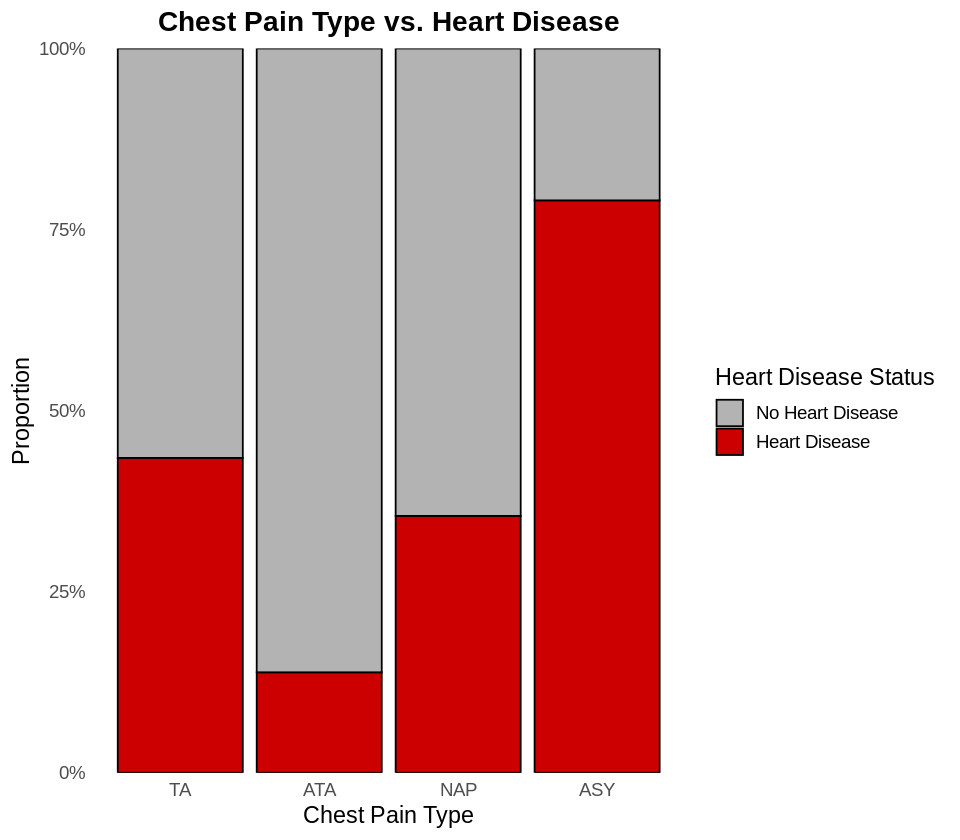

In [ ]:
library(ggplot2)
library(dplyr)

# Load dataset
df = read.csv("df_cleaned.csv")

# Recode variables
df$HeartDisease = factor(df$HeartDisease, levels = c("1", "0"))  # Heart Disease first for bottom stacking
df$ChestPainType = factor(df$ChestPainType, levels = c("TA", "ATA", "NAP", "ASY"))

# Create summarized and normalized proportion dataset
prop_data = df %>%
  filter(!is.na(ChestPainType), !is.na(HeartDisease)) %>%
  group_by(ChestPainType, HeartDisease) %>%
  summarise(Count = n(), .groups = "drop") %>%
  group_by(ChestPainType) %>%
  mutate(Proportion = Count / sum(Count))

# Bar plot of heart disease proportion by chest pain type
ggplot(prop_data, aes(x = ChestPainType, y = Proportion, fill = HeartDisease)) +
  geom_bar(stat = "identity", position = position_stack(reverse = TRUE), color = "black") +
  scale_fill_manual(
    values = c("1" = "red3", "0" = "gray70"),
    labels = c("1" = "Heart Disease", "0" = "No Heart Disease")
  ) +
  scale_y_continuous(labels = scales::percent, limits = c(0, 1), expand = c(0, 0)) +
  labs(
    title = "Chest Pain Type vs. Heart Disease",
    x = "Chest Pain Type",
    y = "Proportion",
    fill = "Heart Disease Status"
  ) +
  theme_minimal(base_size = 14) +
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold"),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank()
  ) +
  guides(fill = guide_legend(reverse = TRUE))  # Reverse legend order

# ggsave("barplot_chestpaintype_heartdisease.png", width = 8, height = 4, dpi = 300)

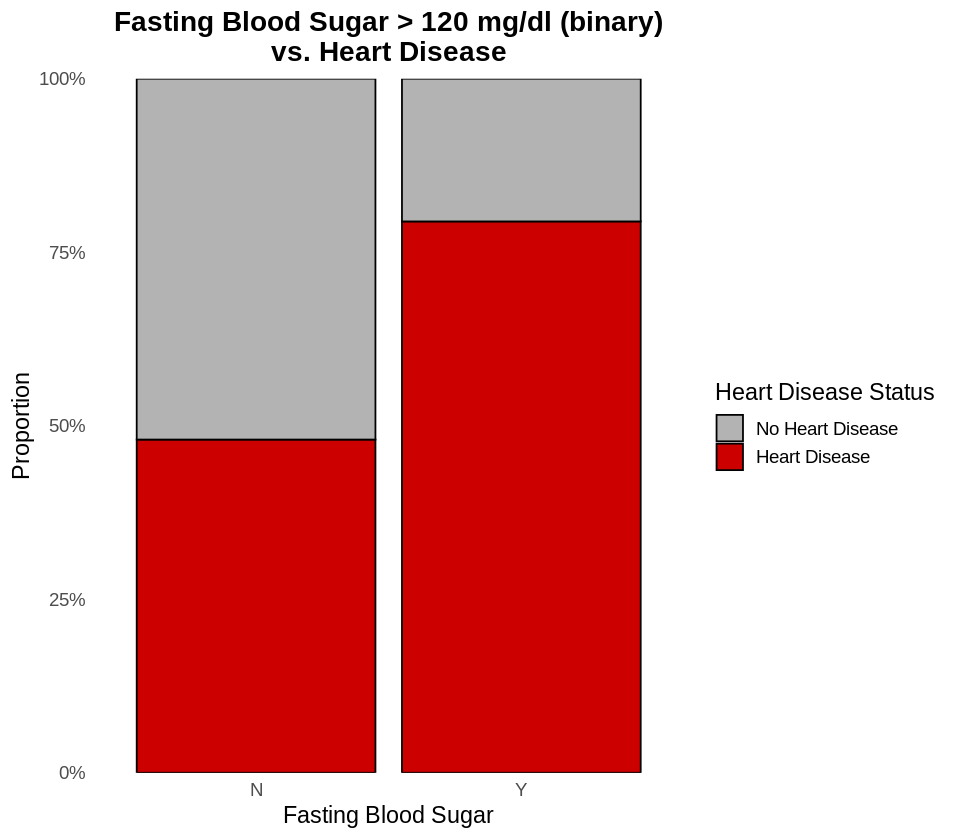

In [ ]:
library(ggplot2)
library(dplyr)

# Load dataset
df_clean = read.csv("df_cleaned.csv")

# Ensure FastingBS and HeartDisease are factors
df_clean$FastingBS = factor(df_clean$FastingBS)
df_clean$HeartDisease = factor(df_clean$HeartDisease, levels = c("1", "0"))  # Heart Disease first

# Create summarized and normalized proportion dataset
prop_data = df_clean %>%
  filter(!is.na(FastingBS), !is.na(HeartDisease)) %>%
  group_by(FastingBS, HeartDisease) %>%
  summarise(Count = n(), .groups = "drop") %>%
  group_by(FastingBS) %>%
  mutate(Proportion = Count / sum(Count))

# Bar plot of heart disease proportion by fasting blood sugar level
ggplot(prop_data, aes(x = FastingBS, y = Proportion, fill = HeartDisease)) +
  geom_bar(stat = "identity", position = position_stack(reverse = TRUE), color = "black") +
  scale_fill_manual(
    values = c("1" = "red3", "0" = "gray70"),
    labels = c("1" = "Heart Disease", "0" = "No Heart Disease")
  ) +
  scale_x_discrete(labels = c("0" = "N", "1" = "Y")) +  # Updated axis labels
  scale_y_continuous(labels = scales::percent, limits = c(0, 1), expand = c(0, 0)) +
  labs(
    title = "Fasting Blood Sugar > 120 mg/dl (binary)\nvs. Heart Disease",
    x = "Fasting Blood Sugar",
    y = "Proportion",
    fill = "Heart Disease Status"
  ) +
  theme_minimal(base_size = 14) +
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold"),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank()
  ) +
  guides(fill = guide_legend(reverse = TRUE))

# ggsave("barplot_fastingbloodsugar_heartdisease.png", width = 8, height = 4, dpi = 300)

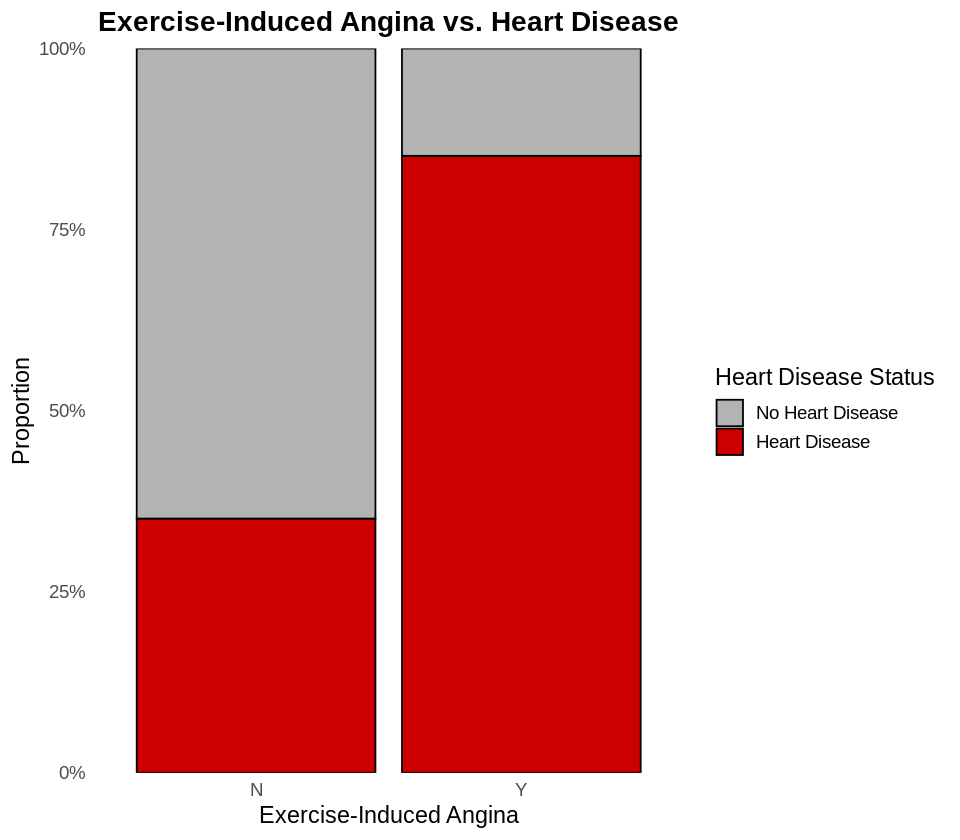

In [ ]:
library(ggplot2)
library(dplyr)

# Load dataset
df_clean = read.csv("df_cleaned.csv")

# Ensure ExerciseAngina and HeartDisease are factors
df_clean$ExerciseAngina = factor(df_clean$ExerciseAngina)
df_clean$HeartDisease = factor(df_clean$HeartDisease, levels = c("1", "0"))  # Heart Disease first

# Create summarized and normalized proportion dataset
prop_data = df_clean %>%
  filter(!is.na(ExerciseAngina), !is.na(HeartDisease)) %>%
  group_by(ExerciseAngina, HeartDisease) %>%
  summarise(Count = n(), .groups = "drop") %>%
  group_by(ExerciseAngina) %>%
  mutate(Proportion = Count / sum(Count))

# Bar plot of heart disease proportion by exercise-induced angina
ggplot(prop_data, aes(x = ExerciseAngina, y = Proportion, fill = HeartDisease)) +
  geom_bar(stat = "identity", position = position_stack(reverse = TRUE), color = "black") +
  scale_fill_manual(
    values = c("1" = "red3", "0" = "gray70"),
    labels = c("1" = "Heart Disease", "0" = "No Heart Disease")
  ) +
  scale_y_continuous(labels = scales::percent, limits = c(0, 1), expand = c(0, 0)) +
  labs(
    title = "Exercise-Induced Angina vs. Heart Disease",
    x = "Exercise-Induced Angina",
    y = "Proportion",
    fill = "Heart Disease Status"
  ) +
  theme_minimal(base_size = 14) +
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold"),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank()
  ) +
  guides(fill = guide_legend(reverse = TRUE))  # Reverse legend order

# ggsave("barplot_exerciseinducedangina_heartdisease.png", width = 8, height = 4, dpi = 300)

## Age Histograms by Disease Status

null device 
          1

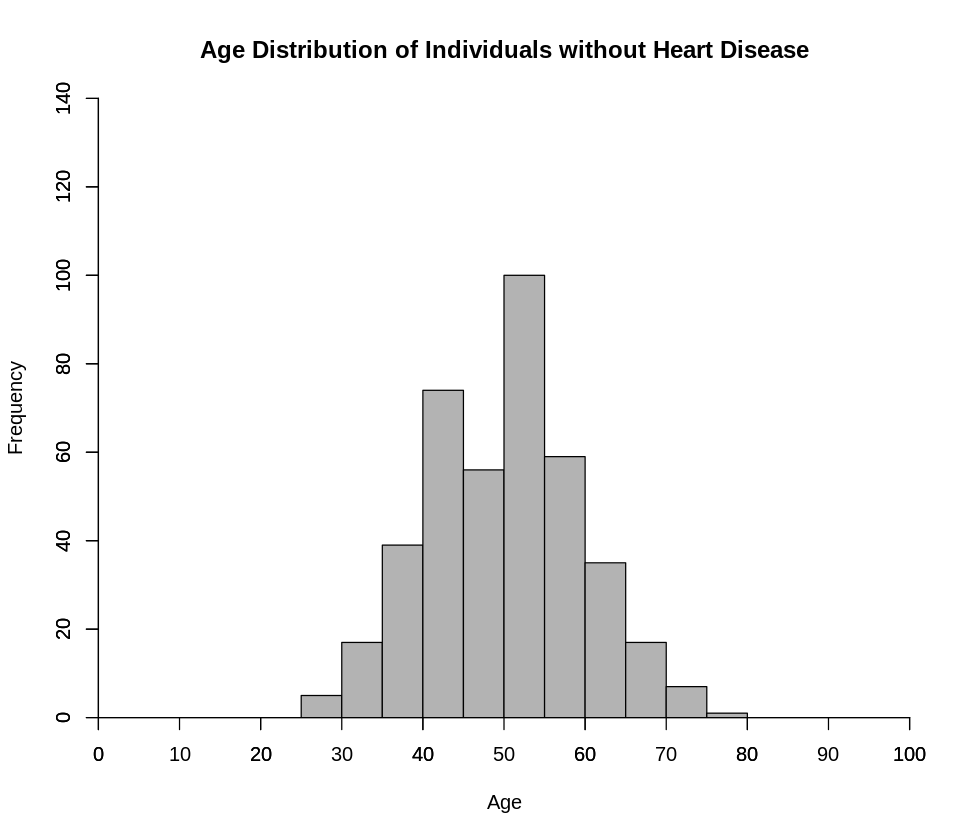

In [ ]:
# Filter for people that don't have heart disease
without_hd = df[df$HeartDisease == 0, ]

# # Save the plot
# png("histogram_age_wohd.png", width = 6, height = 4, units = "in", res = 300)

# Plot the age distribution
hist(without_hd$Age,
     main = "Age Distribution of Individuals without Heart Disease",
     xlab = "Age",
     border = "black",
     col = "gray70",
     xlim = c(0, 100),
     ylim = c(0, 140),
     xaxs = "i",
     yaxs = "i")

# Add custom x-axis with ticks every 10
axis(1, at = seq(0, 100, by = 10))

# Add default y-axis
axis(2)

dev.off()

null device 
          1

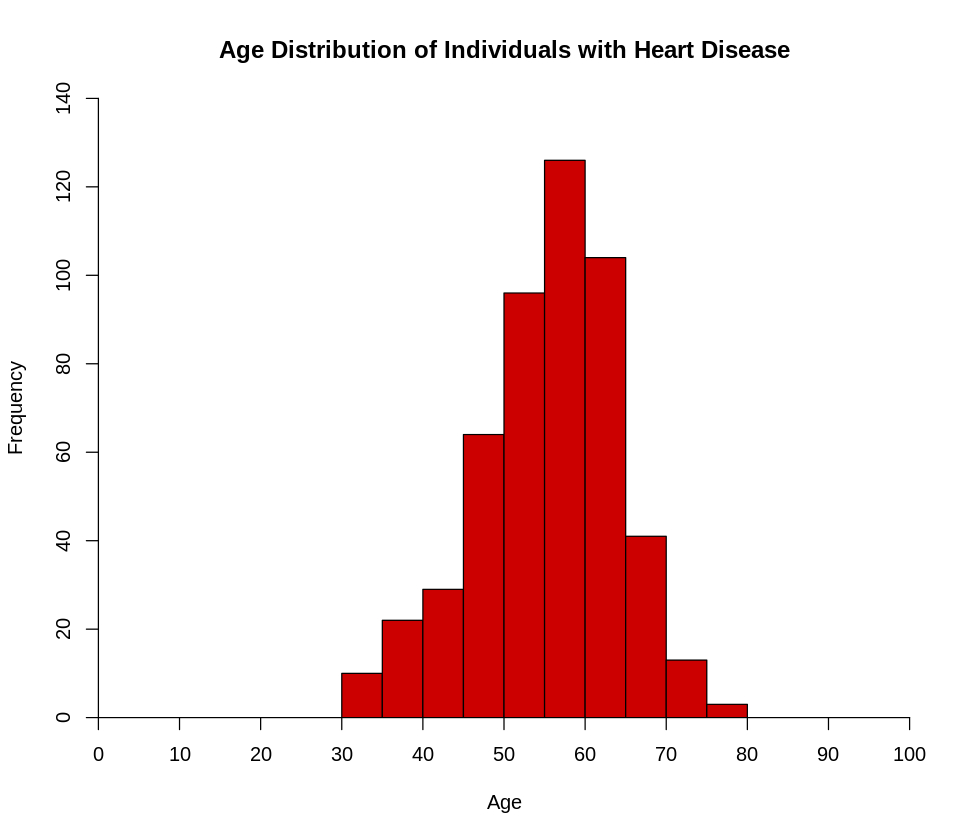

In [ ]:
# Filter rows where HeartDisease = 1
with_hd = df[df$HeartDisease == 1, ]

# # Save the plot (optional)
# png("histogram_age_whd.png", width = 6, height = 4, units = "in", res = 300)

# Plot the histogram without axes
hist(with_hd$Age,
     main = "Age Distribution of Individuals with Heart Disease",
     xlab = "Age",
     border = "black",
     col = "red3",
     xlim = c(0, 100),
     ylim = c(0, 140),
     xaxs = "i",
     yaxs = "i",
     axes = FALSE)

# Add custom x-axis with ticks every 10
axis(1, at = seq(0, 100, by = 10))

# Add default y-axis
axis(2)

dev.off()

## Summary Table of Key Variables by Sex and Disease Status

In [ ]:
# Load required libraries
library(dplyr)
library(knitr)

# Reload the dataset
df = read.csv("df_cleaned.csv")

# Fix factor levels
df$Sex = factor(df$Sex, levels = c("F", "M"), labels = c("Female", "Male"))
df$HeartDisease = factor(df$HeartDisease, levels = c(0, 1), labels = c("No", "Disease"))

# Grouped summary without Oldpeak
summary_table = df %>%
  select(Sex, HeartDisease, Age, RestingBP, Cholesterol, MaxHR) %>%
  group_by(Sex, HeartDisease) %>%
  summarise(
    Count = n(),
    Age = round(mean(Age, na.rm = TRUE), 1),
    RestingBP = round(mean(RestingBP, na.rm = TRUE), 1),
    Cholesterol = round(mean(Cholesterol, na.rm = TRUE), 1),
    MaxHR = round(mean(MaxHR, na.rm = TRUE), 1),
    .groups = "drop"
  )

# Display the summary table
kable(summary_table, caption = "Summary of Key Variables by Heart Disease Status and Sex")




Table: Summary of Key Variables by Heart Disease Status and Sex

|Sex    |HeartDisease | Count|  Age| RestingBP| Cholesterol| MaxHR|
|:------|:------------|-----:|----:|---------:|-----------:|-----:|
|Female |No           |   143| 51.2|     128.8|       249.2| 149.0|
|Female |Disease      |    50| 56.2|     142.0|       272.3| 137.8|
|Male   |No           |   267| 50.2|     130.9|       233.6| 147.7|
|Male   |Disease      |   458| 55.9|     133.6|       246.6| 126.5|

# Hypothesis Testing and Bootstrapping

## Hypothesis 1:

In [ ]:
# Load dataset
df = read.csv("df_cleaned.csv")

# Split ages
age_with_hd = df$Age[df$HeartDisease == 1]
age_without_hd = df$Age[df$HeartDisease == 0]

# Sample statistics
n1 = length(age_with_hd)
n2 = length(age_without_hd)

mean1 = mean(age_with_hd)
mean2 = mean(age_without_hd)

var1 = var(age_with_hd)
var2 = var(age_without_hd)

# Standard error
se = sqrt(var1/n1 + var2/n2)

# t-statistic
t_stat = (mean1 - mean2) / se
t_stat

# degrees of freedom
df_degree = (var1/n1 + var2/n2)^2 / ((var1/n1)^2/(n1-1) + (var2/n2)^2/(n2-1))
df_degree

# p-value for one-sided (greater)
p_value = 1 - pt(t_stat, df_degree)
p_value

[1] 8.82254

[1] 843.6911

[1] 0

2.5%    97.5% 
4.171974 6.536673

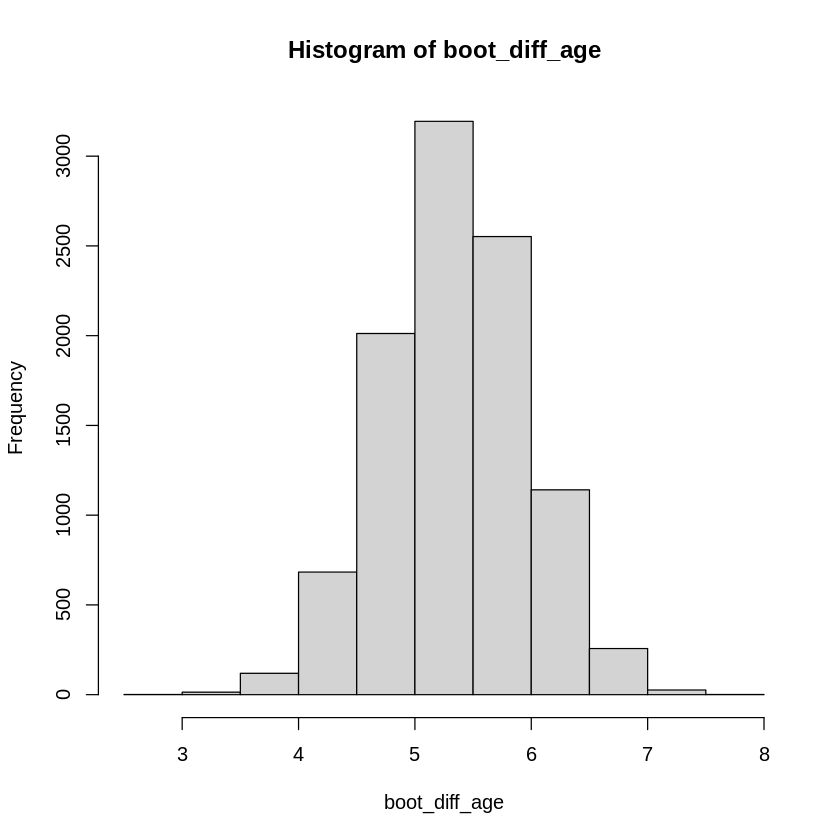

In [ ]:
set.seed(123)

B = 10000

# Bootstrap difference in means
boot_diff_age = replicate(B, {
  sample_with_hd = sample(age_with_hd, n1, replace = TRUE)
  sample_without_hd = sample(age_without_hd, n2, replace = TRUE)
  mean(sample_with_hd) - mean(sample_without_hd)
})

# Histogram
hist(boot_diff_age)

# 95% Percentile Confidence Interval
quantile(boot_diff_age, c(0.025, 0.975))


## Hypothesis 2:

In [ ]:
# Load dataset
df = read.csv("df_cleaned.csv")

# Contingency table
sex_hd_table = table(df$Sex, df$HeartDisease)

# Counts
success_m = sex_hd_table["M", "1"]
success_f = sex_hd_table["F", "1"]

n_m = sum(sex_hd_table["M", ])
n_f = sum(sex_hd_table["F", ])

# Proportions
p_m = success_m / n_m
p_f = success_f / n_f

# Standard error
se = sqrt(p_m*(1 - p_m)/n_m + p_f*(1 - p_f)/n_f)

# z-statistic
z_stat = (p_m - p_f) / se
z_stat

# p-value for one-sided (greater)
p_value = 1 - pnorm(z_stat)
p_value


[1] 10.27472

[1] 0

2.5%     97.5% 
0.2978792 0.4436801

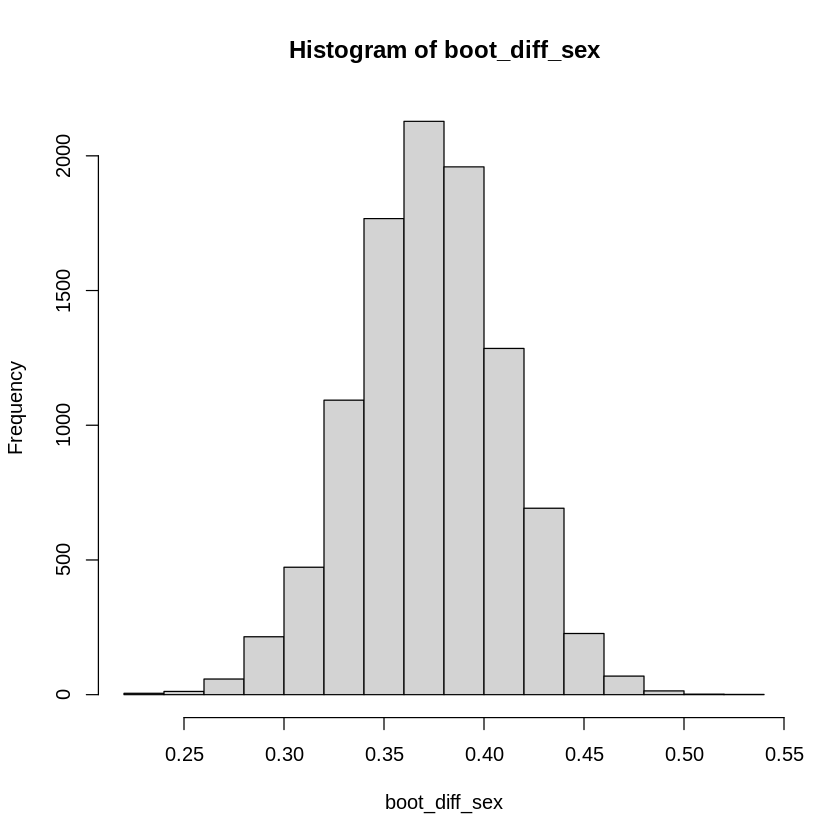

In [ ]:
set.seed(123)

# Sample size
n = nrow(df)

B = 10000

# Bootstrap difference in proportions
boot_diff_sex = replicate(B, {
  sample_df = df[sample(n, replace = TRUE), ]
  prop_male = mean(sample_df$HeartDisease[sample_df$Sex == "M"])
  prop_female = mean(sample_df$HeartDisease[sample_df$Sex == "F"])
  prop_male - prop_female
})

# Histogram
hist(boot_diff_sex)

# 95% Percentile Confidence Interval
quantile(boot_diff_sex, c(0.025, 0.975))


## Hypothesis 3:

In [ ]:
# Load dataset
df = read.csv("df_cleaned.csv")

# Contingency table
fbs_hd_table = table(df$FastingBS, df$HeartDisease)

# Counts
success_high_fbs = fbs_hd_table["1", "1"]
success_low_fbs = fbs_hd_table["0", "1"]

n_high_fbs = sum(fbs_hd_table["1", ])
n_low_fbs = sum(fbs_hd_table["0", ])

# Proportions
p_high = success_high_fbs / n_high_fbs
p_low = success_low_fbs / n_low_fbs

# Standard error
se = sqrt(p_high*(1 - p_high)/n_high_fbs + p_low*(1 - p_low)/n_low_fbs)

# z-statistic
z_stat = (p_high - p_low) / se
z_stat

# p-value for one-sided (greater)
p_value = 1 - pnorm(z_stat)
p_value

[1] 9.400155

[1] 0

2.5%     97.5% 
0.2493879 0.3789455

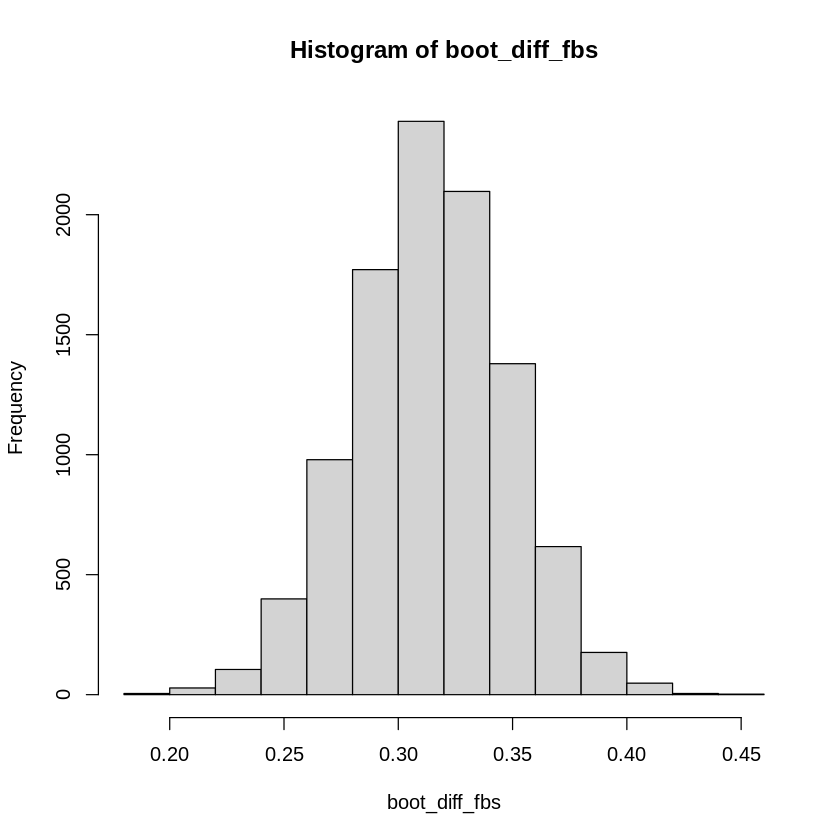

In [ ]:
set.seed(123)

B = 10000

# Bootstrap difference in proportions
boot_diff_fbs = replicate(B, {
  sample_df = df[sample(n, replace = TRUE), ]
  prop_high_fbs = mean(sample_df$HeartDisease[sample_df$FastingBS == 1])
  prop_normal_fbs = mean(sample_df$HeartDisease[sample_df$FastingBS == 0])
  prop_high_fbs - prop_normal_fbs
})

# Histogram
hist(boot_diff_fbs)

# 95% Percentile Confidence Interval
quantile(boot_diff_fbs, c(0.025, 0.975))
